# Semantic similarity for schematic

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from dcmr import figures
from cymr import cmr

res_dir = Path(os.environ['PEERS_RESULTS'])
fig_dir = Path(os.environ['PEERS_FIGURES']) / 'plots'

os.makedirs(fig_dir, exist_ok=True)
figures.set_style()

In [2]:
patterns = cmr.load_patterns(res_dir / 'peers_patterns.hdf5')

In [3]:
items = [
    'desk',
    'bed',
    'tree',
    'cat',
    'pillow',
    'dog',
    'leaf',
]
ind = np.array(
    [np.where(patterns['items'] == i.upper())[0][0] for i in items]
)

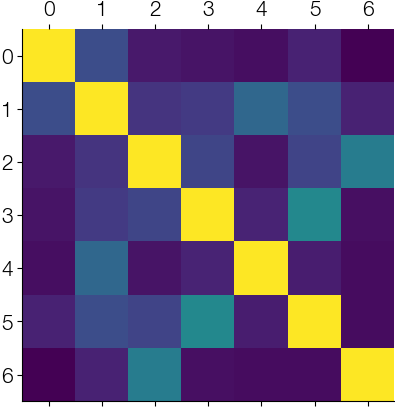

In [4]:
mat = patterns['similarity']['use'][np.ix_(ind, ind)]
plt.matshow(mat);

LINO NOT subset; don't know how to subset; dropped


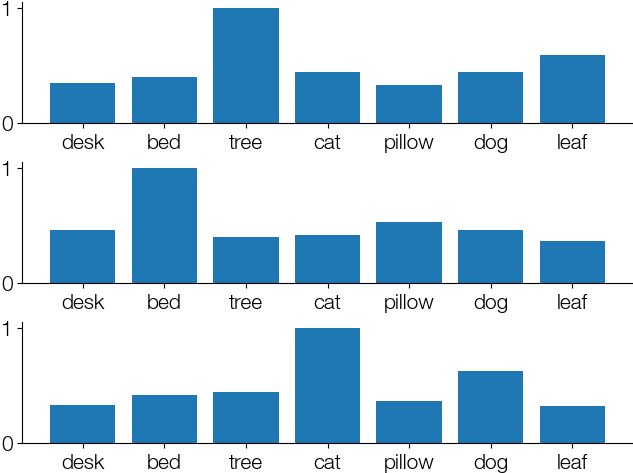

In [5]:
fig, ax = plt.subplots(3, 1, constrained_layout=True)
ax[0].bar(items, mat[2])
ax[1].bar(items, mat[1])
ax[2].bar(items, mat[3])
fig.savefig(fig_dir / 'schematic.pdf')
None

In [6]:
import psifr.stats as ps
ps.percentile_rank(mat[2, 4], mat[2, :])

np.float64(0.0)

In [7]:
ind = np.array([0, 4, 5, 6])
ps.percentile_rank(mat[1, 4], mat[1, ind])

np.float64(1.0)

In [8]:
ps.percentile_rank(mat[3, 4], mat[3, ind])

np.float64(0.6666666666666666)

In [9]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.5.0

cymr      : 0.14.3
numpy     : 2.1.3
dcmr      : 1.0.0a0
psifr     : 0.10.1
matplotlib: 3.10.5

